In [1]:
import cv2, os
import matplotlib.pyplot as plt
import albumentations as A

/raid/coss07/anaconda3/envs/IA/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
# Declare an augmentation pipeline
transform = A.Compose([
    #A.Resize(height = 512, width = 512),
    #A.RandomResizedCrop(p=1, height= 320 ,width= 320, scale=(0.65, 0.85),ratio=(0.90, 1.10)),
    A.RandomBrightnessContrast(always_apply=True, p=1.0, brightness_limit=(1,1), contrast_limit=(0.0, 0.0), brightness_by_max=False),
    #A.SafeRotate(always_apply=True, p=0.5, limit=(-10, 10), interpolation=2, border_mode=0, value=(0, 0, 0), mask_value=None),
    #A.HorizontalFlip(always_apply=False, p=0.5),
    #A.CenterCrop(always_apply=True, p=1, height=256, width=256)
])
transform_o = A.Compose([
    A.Resize(height = 720, width = 1280)
])

In [3]:
def draw_bounding_boxes(img_path, label_path, filename, ax):
    # 이미지와 레이블 파일 경로 구성
    image_path = os.path.join(img_path, filename + '.png')  # 예시: '.png'를 확장자로 가정
    bbox_data = os.path.join(label_path, filename + '.txt')   # 예시: '.txt'를 확장자로 가정

    # 이미지 로드
    image = cv2.imread(image_path)
    if image is None:
        print(f"Image at {image_path} could not be loaded.")
        return
    height, width, _ = image.shape

    # Open and read the bounding box data
    with open(bbox_data, 'r') as file:
        lines = file.readlines()

     # Process each bounding box
    for line in lines:
        class_id, x_center, y_center, bbox_width, bbox_height = map(float, line.split())

        # Convert from relative to absolute coordinates
        x_top_left = int((x_center - bbox_width / 2) * width)
        y_top_left = int((y_center - bbox_height / 2) * height)
        x_bottom_right = int((x_center + bbox_width / 2) * width)
        y_bottom_right = int((y_center + bbox_height / 2) * height)

        # Draw the bounding box (하늘색)
        cv2.rectangle(image, (x_top_left, y_top_left), (x_bottom_right, y_bottom_right), (235, 206, 135), 2)

        # Display the class ID
        cv2.putText(image, str(int(class_id)), (x_top_left, y_top_left - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (235, 206, 135), 2)

    # Convert color from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image with bounding boxes
    ax.imshow(image, interpolation='none')
    ax.axis('off')

In [8]:
# Replace with your image and annotation file paths

task_folder = '202312210553_12_10000'
image_path = f'../wim_data/crop_paste/{task_folder}/train/images/'
label_path = f'../wim_data/crop_paste/{task_folder}/train/labels/'

object_images = [f for f in os.listdir(image_path) if f.endswith('.jpg') or f.endswith('.png')]
print(len(object_images))

10000


In [9]:
k = object_images[1000:1010]

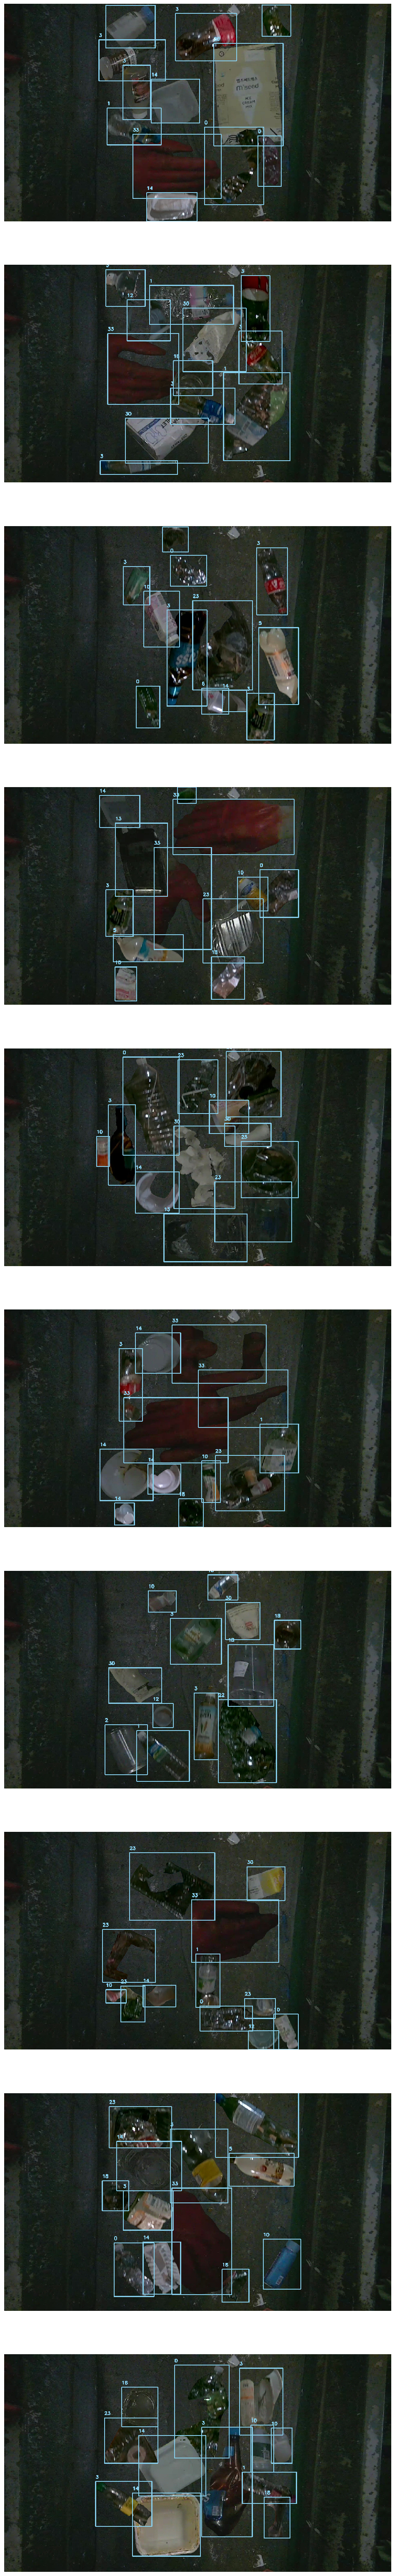

In [10]:
# 리스트 길이에 따라 반복 횟수를 조정

num_rows = len(k)
fig, axs = plt.subplots(num_rows, 1, figsize=(12, num_rows * 8))
for i in range(num_rows):
    draw_bounding_boxes(image_path, label_path, k[i].split('.')[0], axs[i])
